## Introduction

## Setup

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

random_seed = 42

# Business Understanding

# Data Gathering

Let's get the Dataframe imported from the repo. Then let's look at the typical overviews to get a first impression on the upcomming work up until Feature Engineering. The Data can be downloaded from this [page](https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29).

In [149]:
df = pd.read_excel('drug_consumption.xls')

In [150]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [151]:
df.tail()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0
1884,1888,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.12700,1.65653,1.11406,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL6,CL0,CL2


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

In [153]:
df.nunique()

ID           1885
Age             6
Gender          2
Education       9
Country         7
Ethnicity       7
Nscore         49
Escore         42
Oscore         35
Ascore         41
Cscore         41
Impulsive      10
SS             11
Alcohol         7
Amphet          7
Amyl            7
Benzos          7
Caff            7
Cannabis        7
Choc            7
Coke            7
Crack           7
Ecstasy         7
Heroin          7
Ketamine        7
Legalh          7
LSD             7
Meth            7
Shrooms         7
Nicotine        7
Semer           5
VSA             7
dtype: int64

In [154]:
df.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


## Data Structure

The Data consists of 3 types. First we have demographic Data of the survey participants. This Data is being preprocessed by 
First of all we have already preprocessed Data. 

| idx | Variable name |              Description              |  data type  | data format |     data preprocessed     |
|:---:|:-------------:|:-------------------------------------:|:-----------:|:-----------:|:-------------------------:|
|  1  |      Age      |               age-group               | demographic | categorical | pseodo-continuous feature |
|  2  |     Gender    |              male/female              | demographic | categorical | pseodo-continuous feature |
|  3  |   Education   |           educational degree          | demographic | categorical | pseodo-continuous feature |
|  4  |    Country    |                country                | demographic | categorical | pseodo-continuous feature |
|  5  |   Ethnicity   |               ethnicity               | demographic | categorical | pseodo-continuous feature |
|  6  |     Nscore    |              Neuroticism              | personality |  continuous |           -----           |
|  7  |     Escore    |              Extraversion             | personality |  continuous |           -----           |
|  8  |     Oscore    |         Openness to Experience        | personality |  continuous |           -----           |
|  9  |     Ascore    |             Agreeableness             | personality |  continuous |           -----           |
|  10 |     Cscore    |           Conscientiousness           | personality |  continuous |           -----           |
|  11 |   Impulsive   |             Impulsiveness             | personality |  continuous |           -----           |
|  12 |       SS      |        Sensation-Seeking scale        | personality |  continuous |           -----           |
|  13 |    Alcohol    |          alcohol (last cons.)         |   drug-use  | categorical |           -----           |
|  14 |     Amphet    |       amphetamines (last cons.)       |   drug-use  | categorical |           -----           |
|  15 |      Amyl     |       amyl nitrite (last cons.)       |   drug-use  | categorical |           -----           |
|  16 |     Benzos    |      benzodiacepines (last cons.)     |   drug-use  | categorical |           -----           |
|  17 |      Caff     |         caffeine (last cons.)         |   drug-use  | categorical |           -----           |
|  18 |    Cannabis   |         cannabis (last cons.)         |   drug-use  | categorical |           -----           |
|  19 |      Choc     |         chocolate (last cons.)        |   drug-use  | categorical |           -----           |
|  20 |      Coke     |          cocaine(last cons.)          |   drug-use  | categorical |           -----           |
|  21 |     Crack     |           crack(last cons.)           |   drug-use  | categorical |           -----           |
|  22 |    Ecstasy    |          ecstasy(last cons.)          |   drug-use  | categorical |           -----           |
|  23 |     Heroin    |           heroin(last cons.)          |   drug-use  | categorical |           -----           |
|  24 |    Ketamine   |          ketamine(last cons.)         |   drug-use  | categorical |           -----           |
|  25 |     Legalh    |        legal highs(last cons.)        |   drug-use  | categorical |           -----           |
|  26 |      LSD      |            LSD(last cons.)            |   drug-use  | categorical |           -----           |
|  27 |      Meth     |         methadone(last cons.)         |   drug-use  | categorical |           -----           |
|  28 |    Shrooms    |      magic mushrooms(last cons.)      |   drug-use  | categorical |           -----           |
|  29 |    Nicotine   |          nicotine(last cons.)         |   drug-use  | categorical |           -----           |
|  30 |     Semer     |   fictinous drug: Semer (last cons.)  |   drug-use  | categorical |           -----           |
|  31 |      VSA      | volatile substance abuse (last cons.) |   drug-use  | categorical |           -----           |

In [155]:
df.columns


Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Shrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

In [156]:
demographic = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity']
personality = ['Nscore', 'Escore', 'Oscore'
               , 'Ascore', 'Cscore', 'Impulsive', 'SS']
drugs = ['Amphet', 'Amyl', 'Benzos', 'Cannabis'
         , 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine'
         , 'Legalh', 'LSD', 'Meth', 'Shrooms'
         , 'Semer', 'VSA']
drugs_legal = ['Alcohol', 'Caff', 'Choc', 'Nicotine']

# Data Cleaning by Exploration

Note: Consider dropping Ethnicity and/or Ethnicity "non-white"

## First Exploration

In [157]:
# All credit to: https://github.com/dformoso/sklearn-classification/blob/master/Data%20Science%20Workbook%20-%20Census%20Income%20Dataset.ipynb
# Let’s plot the distribution of each feature
def plot_distribution(dataset, cols=4, width=20, height=25, hspace=0.5, wspace=0.2):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xlim([0, 1900])
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xlim([-4, 4])
            plt.xticks(rotation=25)

In [158]:
df.Ethnicity.unique()

array([ 0.126  , -0.31685,  0.1144 , -0.22166, -0.50212, -1.10702,
        1.90725])

In [159]:
lab_enc = LabelEncoder()
for col in drugs+drugs_legal:
    df[col] = lab_enc.fit_transform(df[col])
    # print(lab_enc.classes_)

In [160]:
df_tmp = df.copy()
df_tmp = df_tmp[['Ethnicity', 'Age', 'Gender', 'Education', 'Country']].astype(np.object)\
    .join(df_tmp.drop(columns=['Ethnicity', 'Age', 'Gender', 'Education', 'Country', 'ID']))

In [161]:
df_tmp[drugs+drugs_legal] = df_tmp[drugs+drugs_legal].astype(np.object)

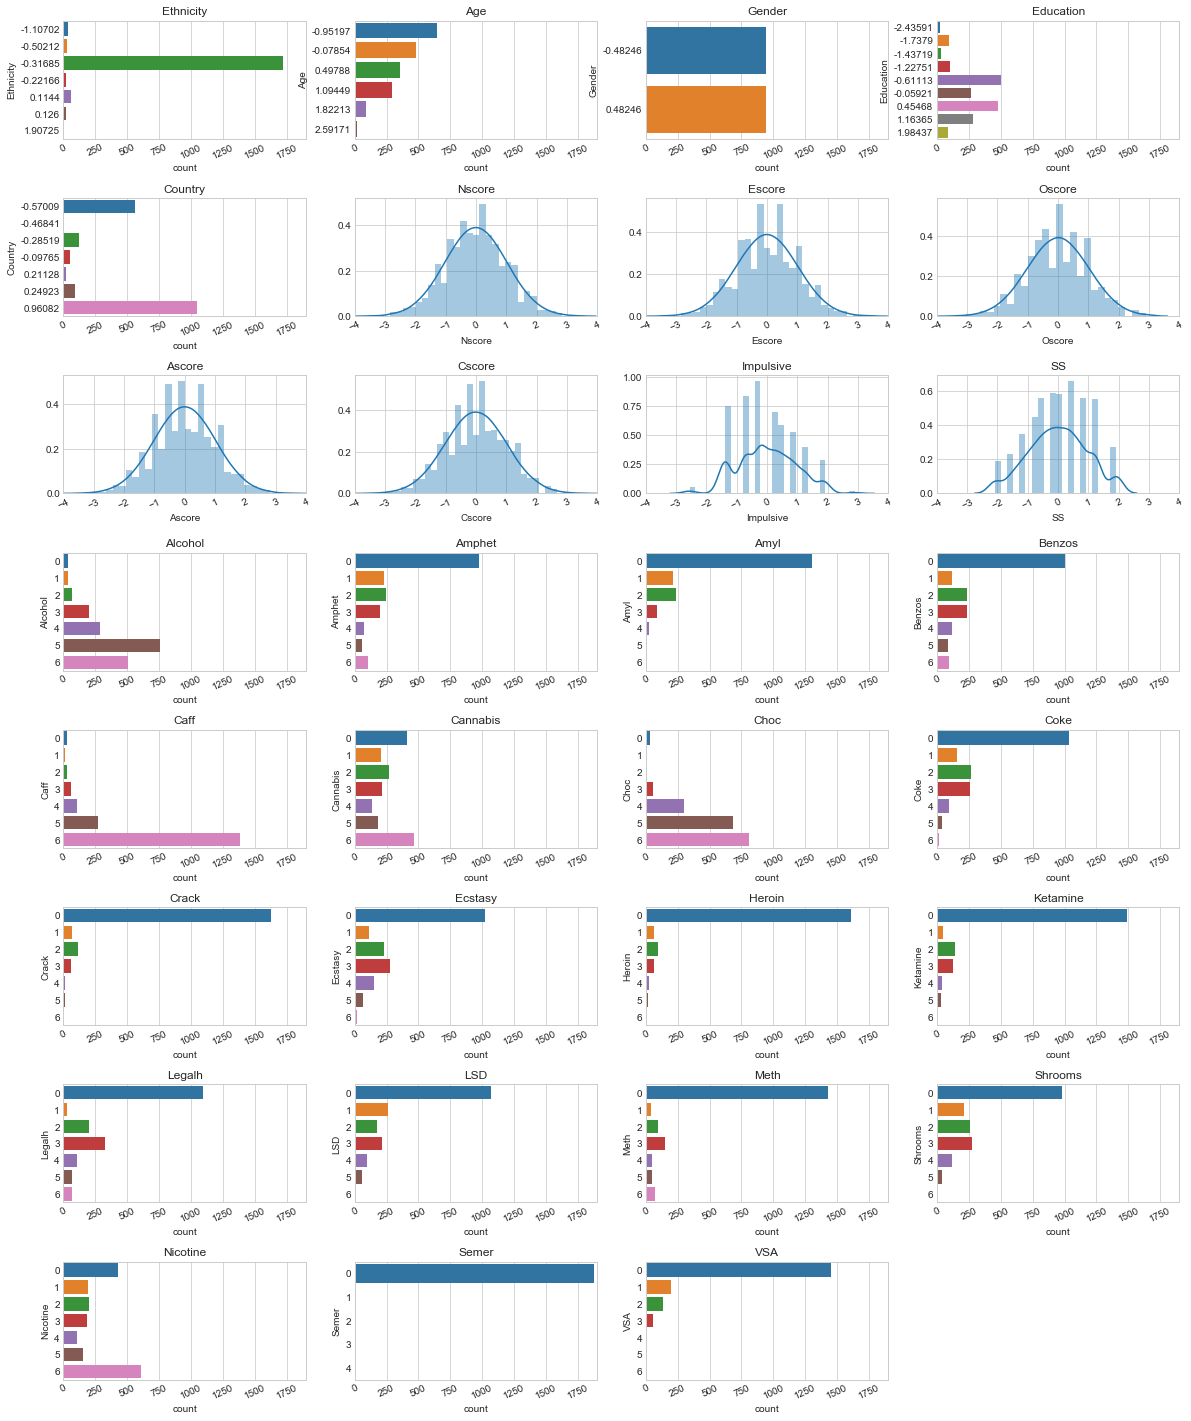

In [162]:
plot_distribution(df_tmp)

## Observations
1. We will merge those instances that left school without degree because the categories contain only few instances and we dont expect no influence on the specific drug use. Because the label is a pseudo-continuous variable we average the labels by the mean value.

2. Likewise we handle the countries. We merge the countries New Zealand, Australia, Canada and Ireland to the group of others. As the average label we also use the mean value.

3. Ethnicity is very unbalanced. We will drop this feature keeping in mind that our model is biased for white people.

4. Semer (semeron) is a fictinous drug which was introduced to identify over-claimers. We will drop those instances that "use" semeron

5. ID doesn't contain any information. We get rid of this column

In [163]:
# Merge Labels: Education, Countries

# 4. Education (Real) is level of education of participant and has one of the values:
# Value Meaning Cases Fraction
# -2.43591 Left school before 16 years 28 1.49%
# -1.73790 Left school at 16 years 99 5.25%
# -1.43719 Left school at 17 years 30 1.59%
# -1.22751 Left school at 18 years 100 5.31%
# -0.61113 Some college or university, no certificate or degree 506 26.84%
# -0.05921 Professional certificate/ diploma 270 14.32%
# 0.45468 University degree 480 25.46%
# 1.16365 Masters degree 283 15.01%
# 1.98437 Doctorate degree 89 4.72%

# we replace all the values below "Some college or university, ..." with the mean label of said labels
df.Education.replace(to_replace=df[df.Education < -0.61113].Education.unique()
                     , value=df[df.Education < -0.61113].Education.mean()
                     , inplace=True)


# 5. Country (Real) is country of current residence of participant and has one of the values:
# Value Meaning Cases Fraction
# 0.96082 UK 1044 55.38%
# 0.24923 Canada 87 4.62%
# 0.21128 Republic of Ireland 20 1.06%
# -0.09765 Australia 54 2.86%
# -0.28519 Other 118 6.26%
# -0.46841 New Zealand 5 0.27%
# -0.57009 USA 557 29.55%

# we replace all the values between "UK" and "USA" with the mean label of said labels
df.Country.replace(to_replace=df[(df.Country > -0.57009) & (df.Country < 0.96082)].Country.unique()
                     , value=df[(df.Country > -0.57009) & (df.Country < 0.96082)].Country.mean()
                     , inplace=True)

In [164]:
# Drop instances: People who said they were using the fictitious drug semeron
df.drop(index=df[df.Semer > 0].index, axis=1, inplace=True)

In [165]:
# Drop Columns: ID, Semer, Ethnicity
cols_dropped = ['ID', 'Semer', 'Ethnicity']
df.drop(columns=cols_dropped, axis=0, inplace=True)

In [166]:
# remove those from the column name lists
demographic.remove('Ethnicity')
drugs.remove('Semer')

# Data Examination

## Examining possible target variables

### Visualizing colinearity of drugs

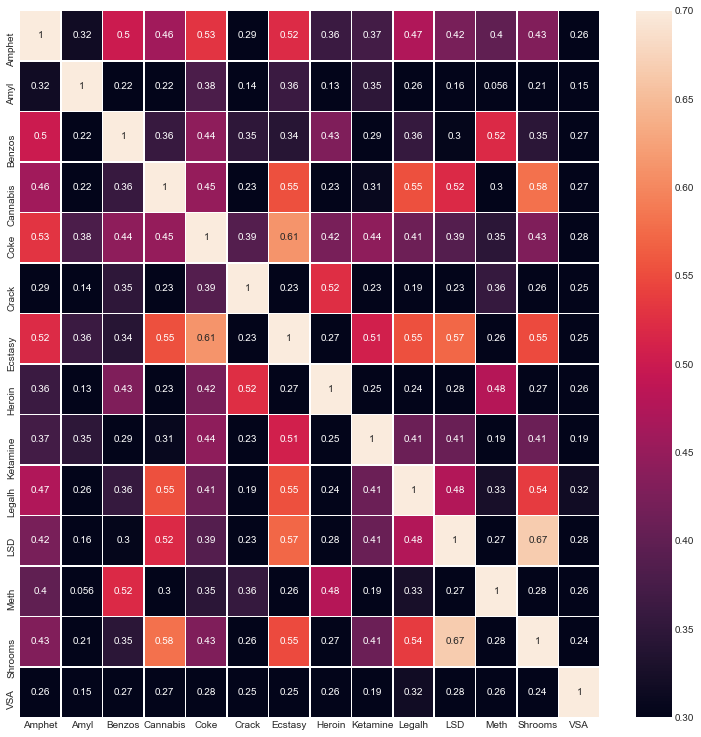

In [167]:
corr = df[drugs].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 13))
    ax = sns.heatmap(corr, annot=True, linewidths=.5, vmin=0.3, vmax=0.7)

### Creating target-groups

By looking at the correlation heatmap we define drug-clusters of correlating drugs. The metric as the measure of collinearity is the correlation-coefficient.
The drugs with the highest number of correlating targets is ecstasy. So we define the first group as group_ecstasy. We take those drugs into account that have a higher correlation coefficient than 0.4.

In [168]:
corr[corr > 0.4].sum().sort_values()

Amyl        1.000000
VSA         1.000000
Crack       1.524627
Meth        1.999048
Heroin      2.855161
Benzos      2.891503
Ketamine    3.178002
LSD         4.064963
Cannabis    4.117569
Amphet      4.339884
Legalh      4.418268
Shrooms     4.602133
Coke        4.740517
Ecstasy     4.868925
dtype: float64

In [169]:
corr[corr > 0.4].Ecstasy

Amphet      0.520795
Amyl             NaN
Benzos           NaN
Cannabis    0.553464
Coke        0.611472
Crack            NaN
Ecstasy     1.000000
Heroin           NaN
Ketamine    0.507360
Legalh      0.554284
LSD         0.572148
Meth             NaN
Shrooms     0.549402
VSA              NaN
Name: Ecstasy, dtype: float64

In [170]:
group_ecstasy = ['Amphet', 'Cannabis', 'Coke', 'Ecstasy'
                 , 'Ketamine', 'Legalh', 'LSD', 'Shrooms']

The first variable in the order that didn't correlate with ecstasy is the drug Benzos. Like we handled ecstasy we create a second group called group_benzos with the same threshold of 0.4 as correlation coefficient.
**Note:** duplicates between those groups are possible

In [171]:
corr[corr > 0.4].Benzos

Amphet      0.500174
Amyl             NaN
Benzos      1.000000
Cannabis         NaN
Coke        0.442867
Crack            NaN
Ecstasy          NaN
Heroin      0.428311
Ketamine         NaN
Legalh           NaN
LSD              NaN
Meth        0.520150
Shrooms          NaN
VSA              NaN
Name: Benzos, dtype: float64

In [172]:
group_benzos = ['Amphet', 'Coke', 'Benzos', 'Heroin', 'Meth']

We apply the same methodology to remaining variable: Crack.

In [173]:
corr[corr > 0.4].Crack

Amphet           NaN
Amyl             NaN
Benzos           NaN
Cannabis         NaN
Coke             NaN
Crack       1.000000
Ecstasy          NaN
Heroin      0.524627
Ketamine         NaN
Legalh           NaN
LSD              NaN
Meth             NaN
Shrooms          NaN
VSA              NaN
Name: Crack, dtype: float64

In [174]:
group_crack = ['Crack', 'Heroin']

### Final Targets
Generally the idea is to predict drug users vs. non-users. We define two scenarios to separate them. In the first scenario a drug user on at least a yearly basis, in the second on at least a weekly basis. These two scenarios are considered for each of our drug groups defined above. That is we predict if a person is a user/non-user for one of the drug groups.

| **type** |  **definition**                                              | **col_name**| **value**  |
|:----------:|:-------------------------------------------------------------|------------|---|
| non-user | never, over a decade ago, last decade                        | year_user  | 0 |
| user     | last year, last month, last week, last day                   | year_user  | 1 |
| non-user | never, over a decade ago, last decade, last year             | month_user | 0 |
| user     | last month, last week, last day                              | month_user | 1 |

#### Data format of target variables
+ 0: Never Used
+ 1: Used over a Decade Ago
+ 2: Used in Last Decade
+ 3: Used in Last Year
+ 4: Used in Last Month
+ 5: Used in Last Week
+ 6: Used in Last Day

In [175]:
df.head()

,Age,Gender,Education,Country,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,...,0,0,0,0,0,0,0,0,2,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,...,0,4,0,2,0,2,3,0,4,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,...,0,0,0,0,0,0,0,1,0,0
3,-0.95197,0.48246,1.16365,0.96082,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,...,0,0,0,2,0,0,0,0,2,0
4,0.49788,0.48246,1.98437,0.96082,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,...,0,1,0,0,1,0,0,2,2,0


In [176]:
# Generate the target variables
# 1: user, 0: non-user
# In total we have 6 target variables 1 for each of the three groups for the two scenarios
for t, name_t in zip([3, 4], ['yearly', 'monthly']): # t is the relevant time threshold for separating the user/non-user groups
    for group, name_group in zip([group_ecstasy, group_benzos, group_crack], ['ecstasy', 'benzos', 'crack']):
        name = name_t + '_user_' + name_group
        mask = (df[group] >= t).any(axis=1)
        df[name] = mask.astype(np.int)

### Visualizing target groups

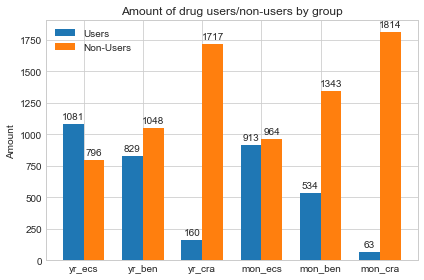

In [177]:
labels = ['yr_ecs', 'yr_ben', 'yr_cra', 'mon_ecs', 'mon_ben','mon_cra']
targets = ['yearly_user_ecstasy','yearly_user_benzos','yearly_user_crack'
           ,'monthly_user_ecstasy','monthly_user_benzos','monthly_user_crack']

users = []
non_users = []
for i in targets:
    users.append(df[i].sum())
    non_users.append(df.shape[0] - df[i].sum())

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, users, width, label='Users')
rects2 = ax.bar(x + width/2, non_users, width, label='Non-Users')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Amount')
ax.set_title('Amount of drug users/non-users by group')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

The last target-groups: monthly crack users and yearly crack users are very unbalanced. The group of users doesnt consist of enough data points for a consistent prediction.

We will drop the target variable crack-user. For this we want to drop those instances that only use crack, because they would otherwise be declared as non-users consistently. Those that use other drugs will be kept.

In [178]:
# Check whether there are crack users, that don't use any other drug

df_tmp = df[(df['yearly_user_crack']==1) & 
             ((df['yearly_user_ecstasy']==0) & (df['yearly_user_benzos']==0)) |
             (df['monthly_user_crack']==1) &
             ((df['monthly_user_ecstasy']==0) & (df['monthly_user_benzos']==0))]

print(df.shape)
print(df_tmp.shape)

(1877, 35)
(0, 35)


Since all crack users also consime other drugs, no instance has to be deleted. We delete "monthly_user_crack" and "yearly_user_crack" from the dataframe.

In [179]:
df.drop(columns=["monthly_user_crack","yearly_user_crack"], axis=0, inplace=True)
targets.remove("monthly_user_crack")
targets.remove("yearly_user_crack")

In [180]:
#pair = df[demographic+personality+drugs_legal]
#sns.pairplot(pair, kind="reg")

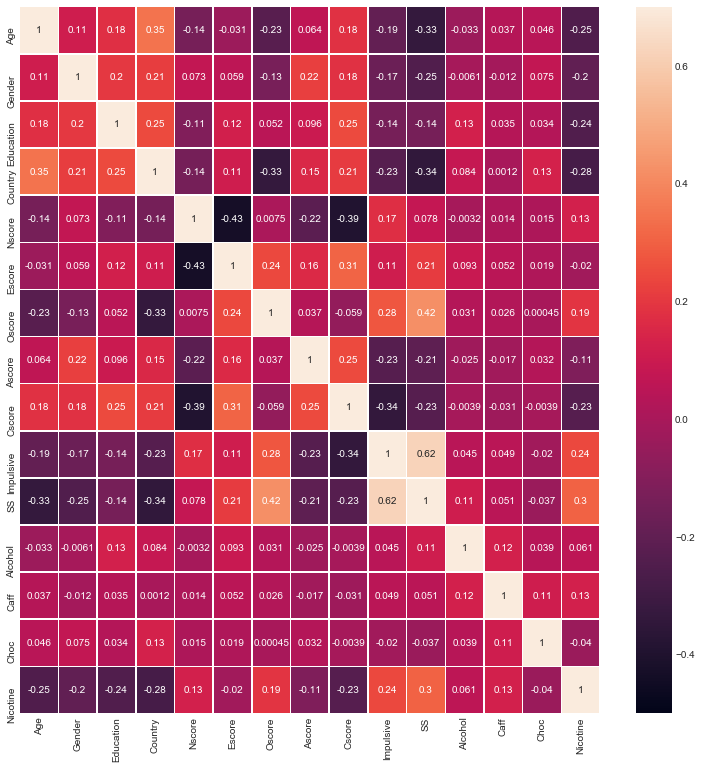

In [181]:
corr = df[demographic+personality+drugs_legal].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 13))
    ax = sns.heatmap(corr, annot=True, linewidths=.5, vmin=-0.5, vmax=0.7)

In general the correlations between the features are low, except the variable "Impulsive Sensation Seeking Scale (SS)", that correlates with "Impulsiveness (Impulsive)". We will drop "SS".

In [182]:
df.drop(columns=["SS"], axis=0, inplace=True)
personality.remove("SS")

# Feature Engeneering

We will treat the scores as continous variables and the demographic variables as categorical.

In [183]:
# create dummys and drop first column
df_dum_dem      = pd.get_dummies(df[demographic].astype(np.object), drop_first=True)
df_dum_drugs_le = pd.get_dummies(df[drugs_legal].astype(np.object), drop_first=True)

# concat variables
df = pd.concat([df, df_dum_dem, df_dum_drugs_le], axis=1)
df.drop(columns=demographic, axis=0, inplace=True)
df.drop(columns=drugs_legal, axis=0, inplace=True)
print(df.shape)
df.head()

(1877, 61)


,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Amphet,Amyl,Benzos,Cannabis,...,Choc_3,Choc_4,Choc_5,Choc_6,Nicotine_1,Nicotine_2,Nicotine_3,Nicotine_4,Nicotine_5,Nicotine_6
0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,2,0,2,0,...,0,0,1,0,0,1,0,0,0,0
1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,2,2,0,4,...,0,0,0,1,0,0,0,1,0,0
2,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0,0,0,3,...,0,1,0,0,0,0,0,0,0,0
3,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,0,0,3,2,...,0,1,0,0,0,1,0,0,0,0
4,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,1,1,0,3,...,0,0,0,1,0,1,0,0,0,0


In [184]:
# Rename the columns of the dummy variables
names={'Age_-0.07854':'Age_25-34'
       , 'Age_0.49788':'Age_35-44'
       , 'Age_1.09449':'Age_45-54'
       , 'Age_1.82213':'Age_55-64'
       , 'Age_2.59171':'Age_65+'
       , 'Gender_0.48246':'Gender_female'
       , 'Education_-0.61113':'Edu_nodiploma'
       , 'Education_-0.05921':'Edu_diploma'
       , 'Education_0.45468':'Edu_uni'
       , 'Education_1.16365':'Edu_masters'
       , 'Education_1.98437':'Edu_doc'
       , 'Country_-0.05408084507042253':'Country_other'
       , 'Country_0.96082':'Country_UK'}

df.rename(columns=names, inplace=True)
df.columns

Index(['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'Amphet',
       'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack', 'Ecstasy', 'Heroin',
       'Ketamine', 'Legalh', 'LSD', 'Meth', 'Shrooms', 'VSA',
       'yearly_user_ecstasy', 'yearly_user_benzos', 'monthly_user_ecstasy',
       'monthly_user_benzos', 'Age_25-34', 'Age_35-44', 'Age_45-54',
       'Age_55-64', 'Age_65+', 'Gender_female', 'Edu_nodiploma', 'Edu_diploma',
       'Edu_uni', 'Edu_masters', 'Edu_doc', 'Country_other', 'Country_UK',
       'Alcohol_1', 'Alcohol_2', 'Alcohol_3', 'Alcohol_4', 'Alcohol_5',
       'Alcohol_6', 'Caff_1', 'Caff_2', 'Caff_3', 'Caff_4', 'Caff_5', 'Caff_6',
       'Choc_1', 'Choc_2', 'Choc_3', 'Choc_4', 'Choc_5', 'Choc_6',
       'Nicotine_1', 'Nicotine_2', 'Nicotine_3', 'Nicotine_4', 'Nicotine_5',
       'Nicotine_6'],
      dtype='object')

# Predictive Modelling

## Metric to evaluate the model

We want that our prediction has a low rate on False Positives (FP), so that no person is wrongly predicted to be a drug user. That is, we want to maximize the Precision.

F_beta score can be used to weight the influence of Recall versus Precision.

note:Decide which metric we should use

## Define target and features for modelling

We devide the problem into four binary classification problems. Therefore we train four different models. One for each binary problem. The binary problems are being "stored" in the list "targets".

In [185]:
features = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 
       'Age_25-34', 'Age_35-44', 'Age_45-54', 'Age_55-64', 'Age_65+', 
       'Gender_female', 'Edu_nodiploma', 'Edu_diploma',
       'Edu_uni', 'Edu_masters', 'Edu_doc', 'Country_other', 'Country_UK',
       'Alcohol_1', 'Alcohol_2', 'Alcohol_3', 'Alcohol_4', 'Alcohol_5',
       'Alcohol_6', 'Caff_1', 'Caff_2', 'Caff_3', 'Caff_4', 'Caff_5', 'Caff_6',
       'Choc_1', 'Choc_2', 'Choc_3', 'Choc_4', 'Choc_5', 'Choc_6',
       'Nicotine_1', 'Nicotine_2', 'Nicotine_3', 'Nicotine_4', 'Nicotine_5',
       'Nicotine_6']
targets = ['yearly_user_ecstasy', 'yearly_user_benzos', 'monthly_user_ecstasy', 'monthly_user_benzos']

In [345]:
# define test and train datasets
X_train, X_test, y_train, y_test = train_test_split(df[features]
                                                    , df[targets]
                                                    , stratify = df[targets]
                                                    , test_size=0.2, random_state=random_seed)                                    
# We address the respective target variable via "masking" the y_test or y_train dataframe
# e.g. y_test['monthly_user_ecstasy']

In [354]:
# Even though most of the data has been scaled already
# we will scale everything again because we use distance-based models like KNN

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=df[features].columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=df[features].columns)

## Defining the Baseline

Let's take a look at the distributions we have here. Our goal is to predict drug users. The metric we use is the precision of predicting a actual drug user as a drug user for all scenarios. The baseline prediction we can make is predicting every person as a drug user. The precision of this prediction will be the ratio between drug users and all instances.

Note: We can not use as baseline the prediction of the majority class, because if the majority class is non-user the resulting precision would be 0.

In [300]:
baselines = y_train.sum()/y_train.shape[0]
baselines

yearly_user_ecstasy     0.576282
yearly_user_benzos      0.441706
monthly_user_ecstasy    0.486342
monthly_user_benzos     0.284477
dtype: float64

## Model Selection

note: create a function to train a model and make the respective evaluation with a pretty output for our metric. This function contains GridSearch and Cross-Validation and stores the best models.

Then run this function for different models and target variables to compare them.

Overview over scores:
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [226]:
def model_evaluation(X_train, y_train, clf, 
                     params_model=None, 
                     params_cross={"cv":5, "scoring":['accuracy','precision','f1','roc_auc']}):
    
    # cross validation
    scores = cross_validate(clf, X_train, y_train, **params_cross)
    scores = {key: value.mean() for (key, value) in scores.items()}
    #print("Precision: %0.2f" % (scores['test_precision'].mean()))
    return scores

In [227]:
clf = [LogisticRegression(solver="lbfgs")
       , KNeighborsClassifier(n_neighbors=5)
       , SVC(C=1, kernel="rbf", gamma='scale')
       , RandomForestClassifier(n_estimators=500, criterion="gini", max_depth=5)
       , AdaBoostClassifier()
       , XGBClassifier()]

In [266]:
results = {}
for model in clf:
    model_name = model.__class__.__name__
    results[model_name] = {}
    for target in targets:
        #print("-"*20)
        #print("Model: " + model.__class__.__name__)
        scores = model_evaluation(X_train, y_train[target], model)
        #print(model_evaluation(X_train, y_train[target], model))
        results[model_name][target] = scores
        
#print(results)

Plot the results: make 1 plot for each of the metrics precision, f1_score, accuray and roc_auc. 

Displayed are the scores of each of the 6 models ('LogReg', 'KNN', 'SVM', 'RF', 'Ada', 'XG') for each of the two scenarios (yearly and monthly users) for the two groups ('yr_ecs', 'yr_ben','mon_ecs', 'mon_ben')

In [267]:
labels = ['yr_ecs', 'yr_ben','mon_ecs', 'mon_ben']

models_labels = ['LogReg', 'KNN', 'SVM', 'RF', 'Ada', 'XG']
models = list(results.keys())


In [268]:
def plot_results(results, labels, models_labels, score='test_precision', title='Precision'):
    fig, ax = plt.subplots(figsize=(10,5))
    models = list(results.keys())
    
    x = np.arange(0, (len(models_labels)+2)*len(labels), len(models)+2)
    for mod in models:        
        mod_list = []
        x += 1
        for i in targets:
            mod_list.append(results[mod][i].get(score))
        rects1 = ax.bar(x - width/2, mod_list, width, label=mod, alpha=1)
        ax.set_ylabel('score')
        ax.set_title(title)
        ax.set_ylim(0.5,0.95)
        ax.set_xticks(x-len(models)/2)
        ax.set_xticklabels(labels)
        ax.legend()

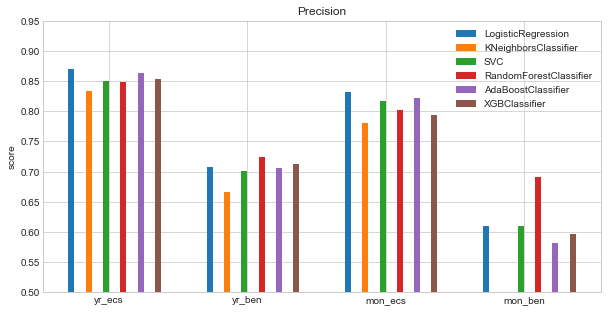

In [270]:
plot_results(results, labels, models_labels)

In [232]:
def print_score_table(results, score='test_precision', mean=False):
    clf = results.keys()
    targets = results[list(results.keys())[0]].keys()
    table = np.zeros([len(clf), len(targets)])
    for i, model in enumerate(clf):
        for j, target in enumerate(targets):
            table[i, j] = results[model][target].get(score)

    table = pd.DataFrame(table).T
    table.index = targets
    table.columns = clf
    if mean:
        return table.mean()
    else:    
        return table

In [276]:
# Display the mean precision score over all scenarios
print_score_table(results, score='test_precision', mean=True)

LogisticRegression        0.754488
KNeighborsClassifier      0.694900
SVC                       0.744126
RandomForestClassifier    0.766486
AdaBoostClassifier        0.742644
XGBClassifier             0.738685
dtype: float64

The goal is to use one model-type for all four scenarios. Therefore we will drop the less performing models after the scoring comparison.

As we see the models test evaluation scores are quite similar: Logistic Regression, RandomForest and Adaboost have the highest scores. We will continue with those 3 from now on.

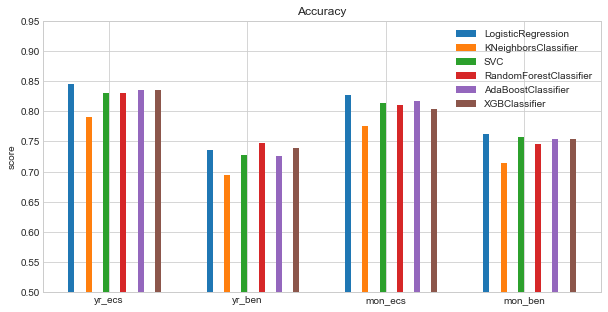

In [196]:
# for further interest we take a look into the accuracy, F1 and ROC AUC scores
plot_results(results, score='test_accuracy', title='Accuracy')

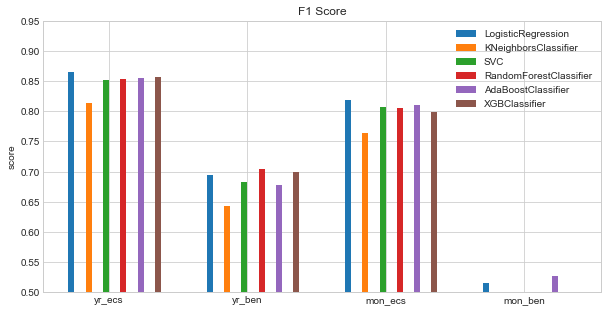

In [197]:
plot_results(results, score='test_f1', title='F1 Score')

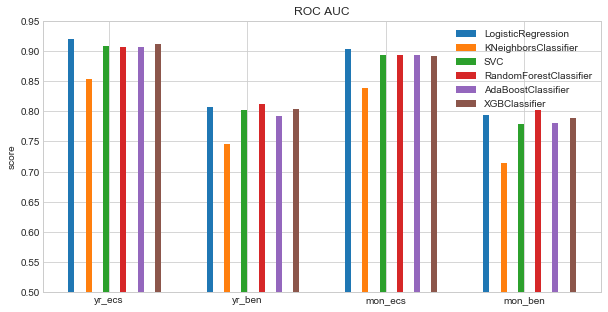

In [198]:
plot_results(results, score='test_roc_auc', title='ROC AUC')

## Hyperparameter optimization

In [323]:
clfs = [LogisticRegression()
       , RandomForestClassifier()
       , AdaBoostClassifier()]

param_sets = [# parameters for logistic regression
          {'penalty':['elasticnet', 'none'],
           'C':[.01, .1, 1, 10, 100],
           'solver':['saga'],
           'n_jobs':[-1],
           'max_iter':[500],
           'l1_ratio':[0, .25, .5, .75, 1]},
          # parameters for RandomForest
          {'n_estimators':[100, 200, 300, 400, 500],
           'criterion':['gini', 'entropy'],
           'max_depth':[2, 4, 6, 8, 10],
           'n_jobs':[-1]},
          # parameters for AdaBoost
          {'base_estimator':[DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],
           'learning_rate':[.1, .5, 1]}
         ]
          

In [324]:
def short_grid_search(X_train, y_train, clf, param):
    CLF = GridSearchCV(clf, param, scoring='precision', n_jobs=-1, cv=5)
    best_clf = CLF.fit(X_train, y_train)
    return best_clf.best_estimator_

In [326]:
def grid_search(X_train, y_train, clfs, param_sets):
    
    # perform the grid-search over all scenarios and all classifiers
    grid_search_results = {}
    for clf, param_set in zip(clfs, param_sets):
        grid_search_results[clf.__class__.__name__] = {}
        for target in targets:
            grid_search_results[clf.__class__.__name__][target] = short_grid_search(X_train
                                                                           , y_train[target]
                                                                           , clf
                                                                           , param_set)
    # Evaluate the best classifiers and return the scores
    grid_search_scores = {}
    for model in grid_search_results.keys():
        grid_search_scores[model] = {}
        for target in grid_search_results[model].keys():
            scores = model_evaluation(X_train, y_train[target], grid_search_results[model].get(target))
            grid_search_scores[model][target] = scores
    
    return grid_search_results, grid_search_scores

In [327]:
grid_search_results, grid_search_scores = grid_search(X_train, y_train, clfs, param_sets)

In [328]:
labels = ['yr_ecs', 'yr_ben','mon_ecs', 'mon_ben']
models_labels = ['LogReg', 'RF', 'Ada']

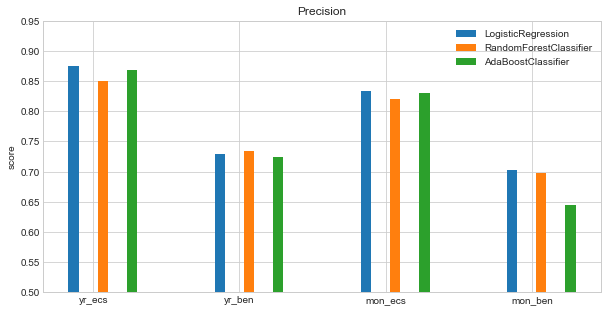

In [329]:
plot_results(grid_search_scores, labels, models_labels)

In [330]:
grid_scores = print_score_table(grid_search_scores, mean=False)
grid_scores

,LogisticRegression,RandomForestClassifier,AdaBoostClassifier
yearly_user_ecstasy,0.875432,0.850273,0.867659
yearly_user_benzos,0.729585,0.733838,0.724485
monthly_user_ecstasy,0.833308,0.819443,0.830652
monthly_user_benzos,0.702814,0.697555,0.644262


In [331]:
print_score_table(grid_search_scores, mean=True)

LogisticRegression        0.785285
RandomForestClassifier    0.775277
AdaBoostClassifier        0.766764
dtype: float64

In [332]:
# By comparing the scores to the scores from above, 
# we see that we increased precision by about 1..3%-points
# LogisticRegression        0.754488
# KNeighborsClassifier      0.694900
# SVC                       0.744126
# RandomForestClassifier    0.766486
# AdaBoostClassifier        0.742644
# XGBClassifier             0.738685

In [333]:
grid_search_results['LogisticRegression']

{'yearly_user_ecstasy': LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=0.75, max_iter=500,
                    multi_class='auto', n_jobs=-1, penalty='elasticnet',
                    random_state=None, solver='saga', tol=0.0001, verbose=0,
                    warm_start=False),
 'yearly_user_benzos': LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=1, max_iter=500,
                    multi_class='auto', n_jobs=-1, penalty='elasticnet',
                    random_state=None, solver='saga', tol=0.0001, verbose=0,
                    warm_start=False),
 'monthly_user_ecstasy': LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=1, max_iter=500,
                    multi_class='auto', n_jobs=-1, penalty='elasticnet',
                    random_state=None, solve

## Feature Selection

As we see above the parameters of the individual best estimators don't spread much. For the business case we would like to have the app that is most easily to use. If we can drop out some features we won't need them in our user-survey. This makes it more user-friendly. Three of the four models had the l1_fraction set to 1 which is a lasso-regularization. Lasso is able to set feature importances to zero. 

Let's calculate the error that we will get by chosing setting the l1_fraction to 1 for the scenario 'monthly_user_benzos'. We will evaluate this model by running through this all scenarios with l1_fraction set to 0 and comparing the precision with the precision we get from the first GridSearch.

In [334]:
clfs = [LogisticRegression()]

param_sets = [# parameters for logistic regression
          {'penalty':['elasticnet', 'none'],
           'C':np.linspace(0.01,1,10),
           'solver':['saga'],
           'n_jobs':[-1],
           'max_iter':[500],
           'l1_ratio':[1]}]
          

In [335]:
gs_results_logreg, gs_scores_logreg = grid_search(X_train, y_train, clfs, param_sets)
grid_scores_logreg = print_score_table(gs_scores_logreg, mean=False)
grid_scores_logreg 

,LogisticRegression
yearly_user_ecstasy,0.875644
yearly_user_benzos,0.726962
monthly_user_ecstasy,0.832741
monthly_user_benzos,0.625011


The drop in precision of about 8%-points in precison of 'monthly_user_benzos' is too high to compensate the possibility of dropping a few features. We try to drop the features that get "lasso'd" from the other models and go back to allow l1_ratio other than one.

In [320]:
 m1 = grid_search_results_logreg['LogisticRegression'].get('yearly_user_benzos')

In [337]:
sorted(zip(*m1.coef_,features))

[(-0.7413866416883896, 'Country_UK'),
 (-0.15318831405492778, 'Ascore'),
 (-0.1524034364932301, 'Country_other'),
 (-0.14658851683382026, 'Gender_female'),
 (-0.14615105013524568, 'Age_45-54'),
 (-0.13533391364901184, 'Age_55-64'),
 (-0.12380951560285647, 'Caff_2'),
 (-0.10079255921172844, 'Age_35-44'),
 (-0.09672890233788073, 'Edu_masters'),
 (-0.09375790091733854, 'Cscore'),
 (-0.08280929676659673, 'Nicotine_2'),
 (-0.062304699112295074, 'Choc_1'),
 (-0.03506852074599891, 'Edu_uni'),
 (-0.02276834329617686, 'Alcohol_4'),
 (-0.013374494942697069, 'Edu_nodiploma'),
 (-0.009841787093359365, 'Alcohol_2'),
 (0.0, 'Alcohol_5'),
 (0.0, 'Caff_3'),
 (0.0, 'Caff_4'),
 (0.0, 'Caff_6'),
 (0.0, 'Choc_2'),
 (0.0, 'Choc_3'),
 (0.0, 'Choc_5'),
 (0.0, 'Choc_6'),
 (0.0, 'Edu_diploma'),
 (0.002758225350393409, 'Age_65+'),
 (0.005305509558441573, 'Alcohol_6'),
 (0.008130178961738312, 'Nicotine_1'),
 (0.01060792175080699, 'Alcohol_1'),
 (0.012684399578735234, 'Caff_1'),
 (0.02679642403340671, 'Edu_doc'),

By looking at the coefficients we see that chocolate and caffeine aren't very promising predictors. Lets drop those features and compare the results to our previous ones.

In [342]:
features2 = [feat for feat in features if all([('Alcohol' not in feat), ('Caff' not in feat), ('Choc' not in feat)])]
mask = df[features].

25
43


In [ ]:
clfs = [LogisticRegression()]

param_sets = [# parameters for logistic regression
          {'penalty':['elasticnet'],
           'C':np.linspace(0.01,1,10),
           'solver':['saga'],
           'n_jobs':[-1],
           'max_iter':[500],
           'l1_ratio':np.linspace(0.1,1,10)}]

gs_results_logreg2, gs_scores_logreg2 = grid_search(X_train[features2], y_train, clfs, param_sets)
grid_scores_logreg2 = print_score_table(gs_scores_logreg2, mean=False)

In [359]:
grid_scores_logreg2.join(grid_scores_logreg, rsuffix='_l-ratio1').join(grid_scores['LogisticRegression'], rsuffix='_orig')

,LogisticRegression,LogisticRegression_l-ratio1,LogisticRegression_orig
yearly_user_ecstasy,0.872538,0.875644,0.875432
yearly_user_benzos,0.735740,0.726962,0.729585
monthly_user_ecstasy,0.841399,0.832741,0.833308
monthly_user_benzos,0.725783,0.625011,0.702814


As we can see we have not only our 8%-points back they even grew to 10%-points for the 'monthly_user_benzos'. In addition we increased our precision on two other models slightly. All of that by dropping out the features:

+ caffeine
+ chocolate
+ alcohol

In [361]:
gs_results_logreg2['LogisticRegression']

{'LogisticRegression': {'yearly_user_ecstasy': LogisticRegression(C=0.23, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=0.1, max_iter=500,
                     multi_class='auto', n_jobs=-1, penalty='elasticnet',
                     random_state=None, solver='saga', tol=0.0001, verbose=0,
                     warm_start=False),
  'yearly_user_benzos': LogisticRegression(C=0.12, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=1.0, max_iter=500,
                     multi_class='auto', n_jobs=-1, penalty='elasticnet',
                     random_state=None, solver='saga', tol=0.0001, verbose=0,
                     warm_start=False),
  'monthly_user_ecstasy': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=0.1, max_iter=500,
                     multi_class='auto', n_jobs=-1, penalty='elasticnet',
  

As we can see 2 models changed from being lasso regularized to not being regularized. This might be because we dropped those features that would be weighted with a 0 regularization coefficient by hand. As a result the remaining features will be weighted a little higher turning the model into a non-regularized model

Conclusion: not all features improve model performance

# Final Evaluation and Visualization

Train the model with the whole X_train dataset (without cv) and Evaluate with the X_test dataset.

# Conclusions

# Future Work